In [1]:
# Hierarchical Clustering
# Hierarchical Clustering performs worse than K-Means on large datasets

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Importing the dataset
!curl https://raw.githubusercontent.com/muke888/UdemyMachineLearning/master/Part4-2.Hierarchical%20Clustering/Mall_Customers.csv -o Mall_Customers.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4286  100  4286    0     0  21979      0 --:--:-- --:--:-- --:--:-- 21867


In [2]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
print(dataset.info())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = dataset.iloc[:, [3, 4]].values
# y = dataset.iloc[:, 3].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

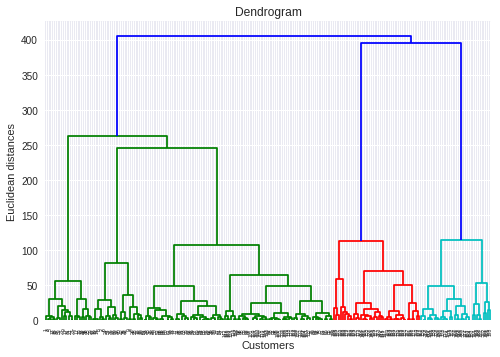

In [4]:
# Using the dendrogram to find the optimal number of clusters, we find n=5, cutting horizontally at the lowest point of the branch from above, getting 5 branches in total.
#Note that this method is exploratory, and does not indicate correct no. of clusters necessarily
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [5]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc[:10]

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3])

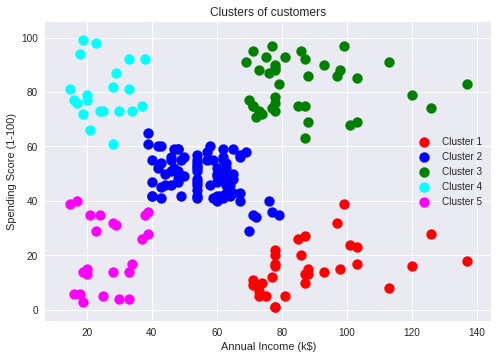

In [6]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()